In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations


from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [2]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_5/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_5/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Output
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525
5,0.683432,0.118663,0.829046,0.567577,78.434389
6,0.553621,0.667350,0.323806,0.814870,57.571537
7,0.352356,0.322242,0.116979,0.473113,109.571876
8,0.153786,0.729382,0.422598,0.443074,8.847992
9,0.463442,0.630025,0.107906,0.957644,233.223610


In [3]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Output':161.986812}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.649999,0.999999,0.999999,0.999999,5115.20243260104]
df.loc[len(df)] = new_data

new_data=[0.3,0.855263,0.95,0.9,1677.31031094248]
df.loc[len(df)] = new_data

# 14 may
df.loc[len(df)]=[0.999999,0.999999,0.999999,0.999999,8662.40500124829]
df.loc[len(df)]=[1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,190.839622015135]
df.loc[len(df)]=[0.999999,0.85,0.85,0.85,3096.47920847264]

# 17 may
df.loc[len(df)]=[0.947368,0.999999,0.999999,0.999999,7744.993860824856]

# 20 may
df.loc[len(df)]=[0.986206,0.996551,0.996551,0.996551,8207.32979758336]
df.loc[len(df)]=[0.900001,0.900001,0.999999,0.900001,4379.0465663322]

# 2 jun
df.loc[len(df)]=[0.97,0.999999,0.97,0.97,7074.98868236043]

# 13 jun
df.loc[len(df)]=[0.999999,0.896551,0.999999,0.999999,7029.471643]
df.loc[len(df)]=[0.793103,0.586207,0.689655,0.482759,81.60809216]

# 18 jun
df.loc[len(df)]=[0.999999,0.999999,0.999999,0.99,8472.57496541567]
df.loc[len(df)]=[0.99,0.99,0.99,0.99,7915.73896894954]

# 22 jun
df.loc[len(df)]=[0.999999,0.99,0.999999,0.999999,8472.57496541567]

# 24 jun
df.loc[len(df)]=[1.00000e-06,1.00000e-06,9.99999e-01,9.99999e-01,1616.62574742823]

# 28 jun
df.loc[len(df)]=[9.99999e-01,9.99999e-01,1.00000e-06,1.00000e-06,1616.62574742823]
df.loc[len(df)]=[0.999999,0.99,0.99,0.999999,8284.85394808834]

# 1 jul
df.loc[len(df)]=[0.999999,0.999999,0.999999,0.999999,8662.40500124829]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,9.99999e-01,1616.62574742823]


#Print
df

,Input_1,Input_2,Input_3,Input_4,Output
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525
5,0.683432,0.118663,0.829046,0.567577,78.434389
6,0.553621,0.667350,0.323806,0.814870,57.571537
7,0.352356,0.322242,0.116979,0.473113,109.571876
8,0.153786,0.729382,0.422598,0.443074,8.847992
9,0.463442,0.630025,0.107906,0.957644,233.223610


In [4]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4       Output
count  40.000000  40.000000  40.000000  40.000000    40.000000
mean    0.621388   0.628420   0.627655   0.677120  2577.628116
std     0.340813   0.356418   0.357162   0.352470  3409.283072
min     0.000001   0.000001   0.000001   0.000001     0.112940
25%     0.340989   0.320901   0.342025   0.425107    64.184289
50%     0.680462   0.751737   0.676774   0.849902   307.088672
75%     0.987155   0.990000   0.991638   0.997413  5593.769735
max     0.999999   0.999999   0.999999   0.999999  8662.405001


In [5]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_5/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_5/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Input_3,Input_4,Output
0,0.944783,0.830509,0.832278,0.202922,1164.732969
1,0.052448,0.436149,0.378457,0.188026,121.188493
2,0.063048,0.866361,0.858649,0.208576,287.522281
3,0.988821,0.663827,0.366481,0.996248,1980.665244
4,0.763322,0.628347,0.782230,0.819196,528.521436
5,0.142756,0.202162,0.938644,0.223203,65.907033
6,0.179976,0.819484,0.364346,0.887966,273.993040
7,0.516454,0.394964,0.951828,0.698802,334.964253
8,0.268447,0.493156,0.006859,0.762327,3.035094
9,0.398184,0.881666,0.116700,0.844628,316.811442


In [6]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Input_3,Input_4,Output
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525
5,0.683432,0.118663,0.829046,0.567577,78.434389
6,0.553621,0.667350,0.323806,0.814870,57.571537
7,0.352356,0.322242,0.116979,0.473113,109.571876
8,0.153786,0.729382,0.422598,0.443074,8.847992
9,0.463442,0.630025,0.107906,0.957644,233.223610


In [7]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4       Output
count  60.000000  60.000000  60.000000  60.000000    60.000000
mean    0.562626   0.624703   0.601392   0.605379  1857.431738
std     0.332827   0.327991   0.342367   0.356957  2977.246311
min     0.000001   0.000001   0.000001   0.000001     0.112940
25%     0.292112   0.385850   0.342025   0.219546    62.000421
50%     0.530570   0.681082   0.673688   0.729281   255.768291
75%     0.939264   0.897413   0.950457   0.960733  1753.149044
max     0.999999   0.999999   0.999999   0.999999  8662.405001


# Function 5: Yield in a Chemical Reaction
#### This time you are trying to optimise another four-dimensional black-box. It corresponds to the yield of a chemical process after processing in some factory. This type of process tends to be unimodal. Try to find the combination of chemicals that maximizes the yield!

## Data exploration

In [8]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4       Output
count  60.000000  60.000000  60.000000  60.000000    60.000000
mean    0.562626   0.624703   0.601392   0.605379  1857.431738
std     0.332827   0.327991   0.342367   0.356957  2977.246311
min     0.000001   0.000001   0.000001   0.000001     0.112940
25%     0.292112   0.385850   0.342025   0.219546    62.000421
50%     0.530570   0.681082   0.673688   0.729281   255.768291
75%     0.939264   0.897413   0.950457   0.960733  1753.149044
max     0.999999   0.999999   0.999999   0.999999  8662.405001

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Input_4    0
Output     0
dtype: int64


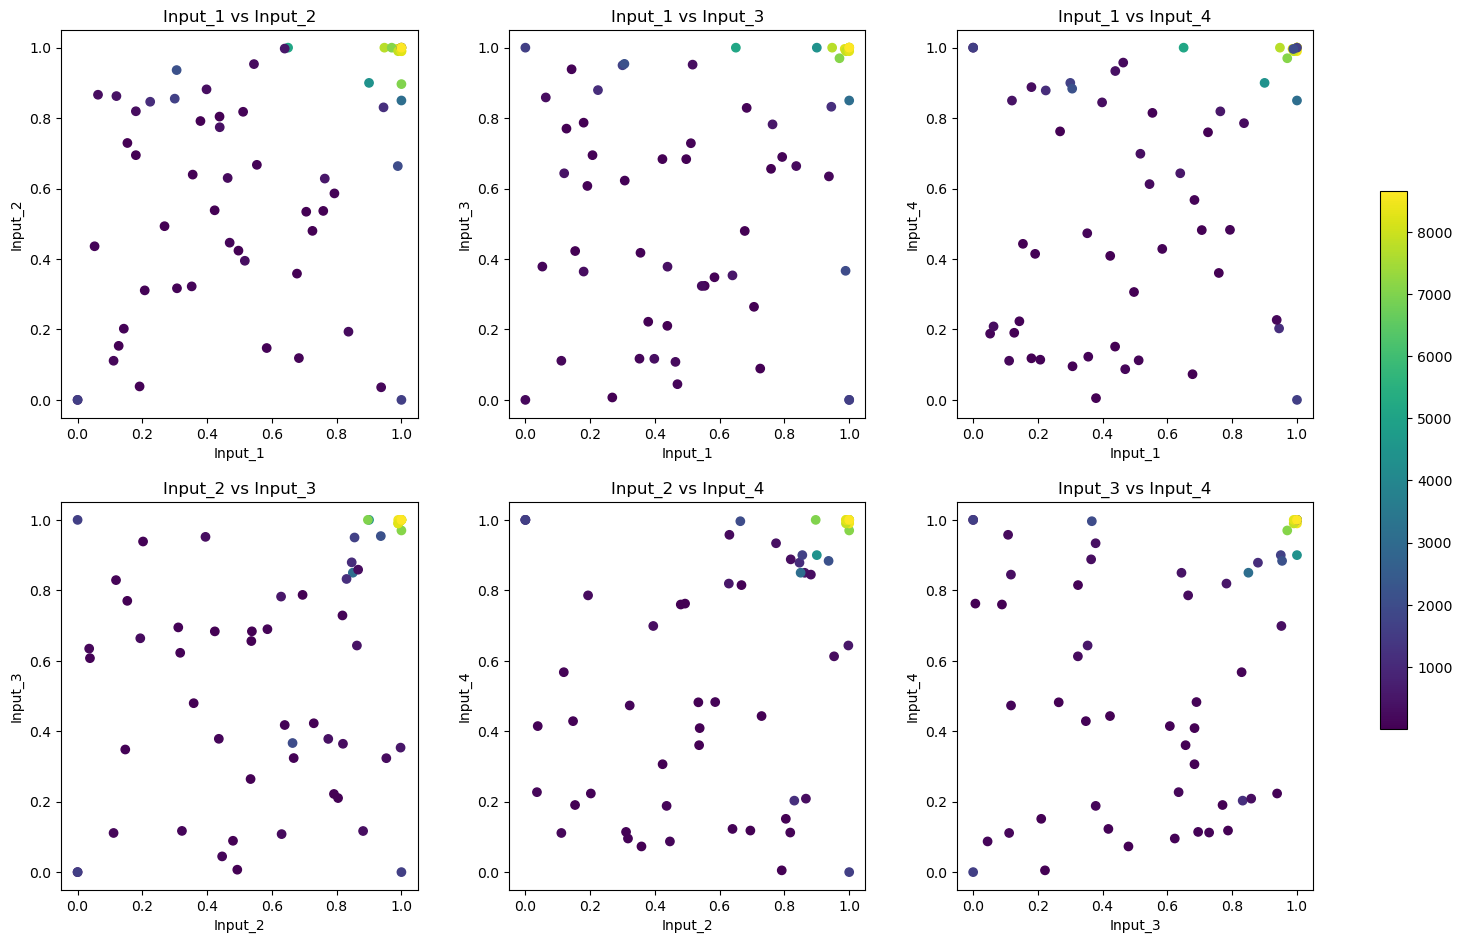

In [9]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

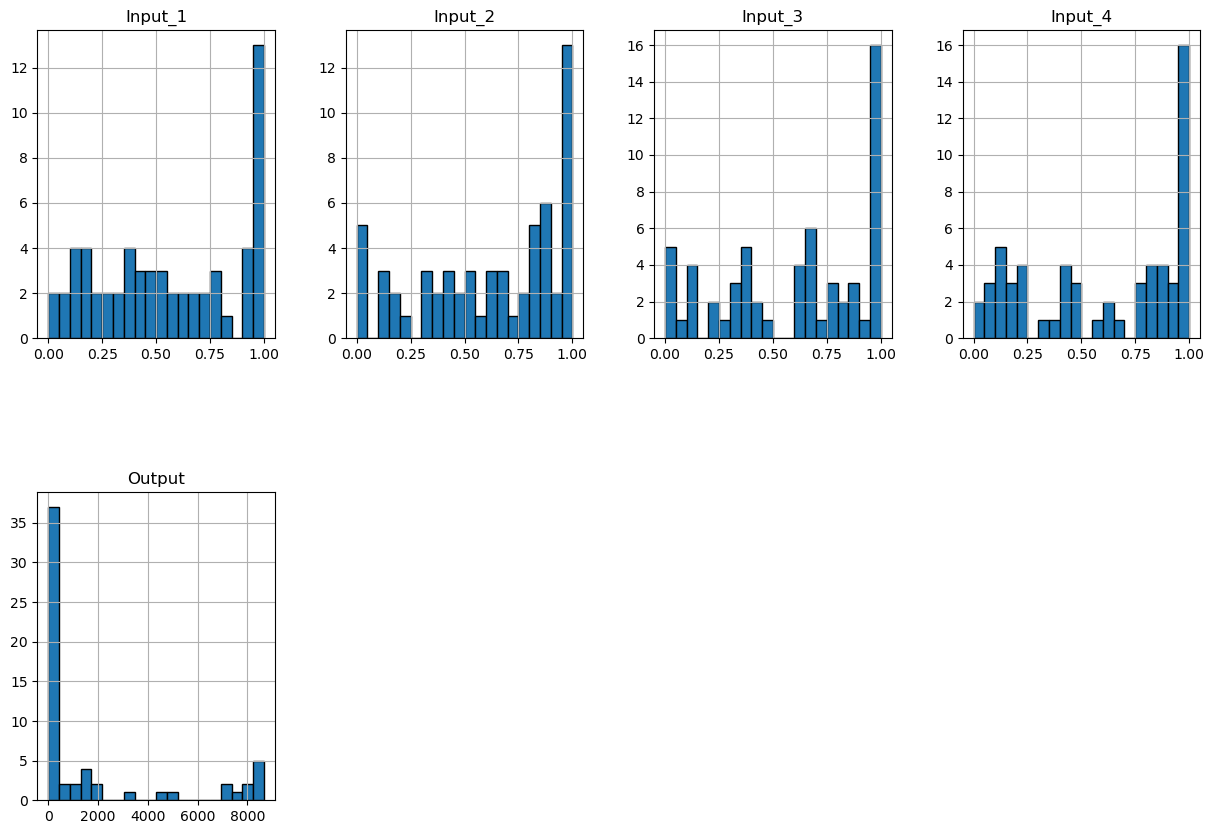

In [10]:
# Plot histograms for each column to understand distributions
df.hist(bins=20, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

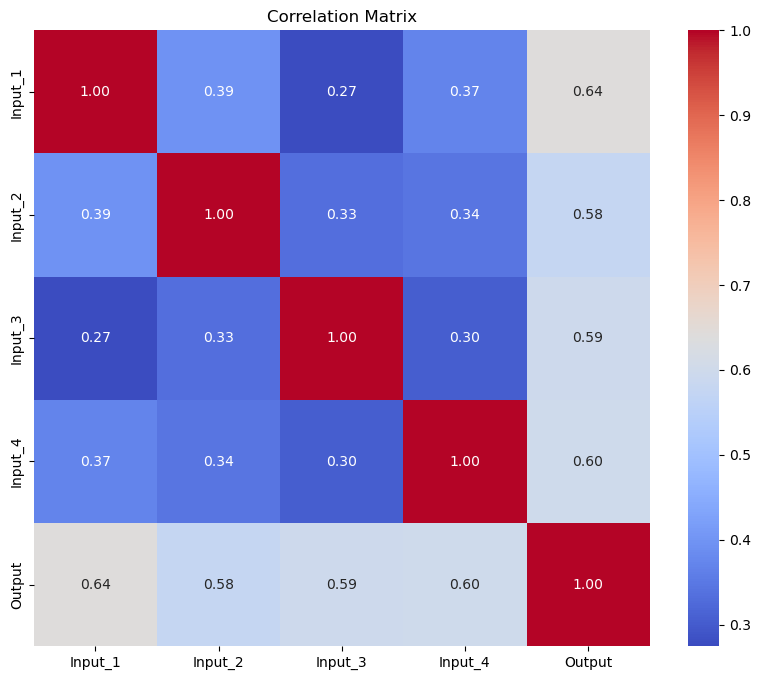

In [11]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

/Users/macponcho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


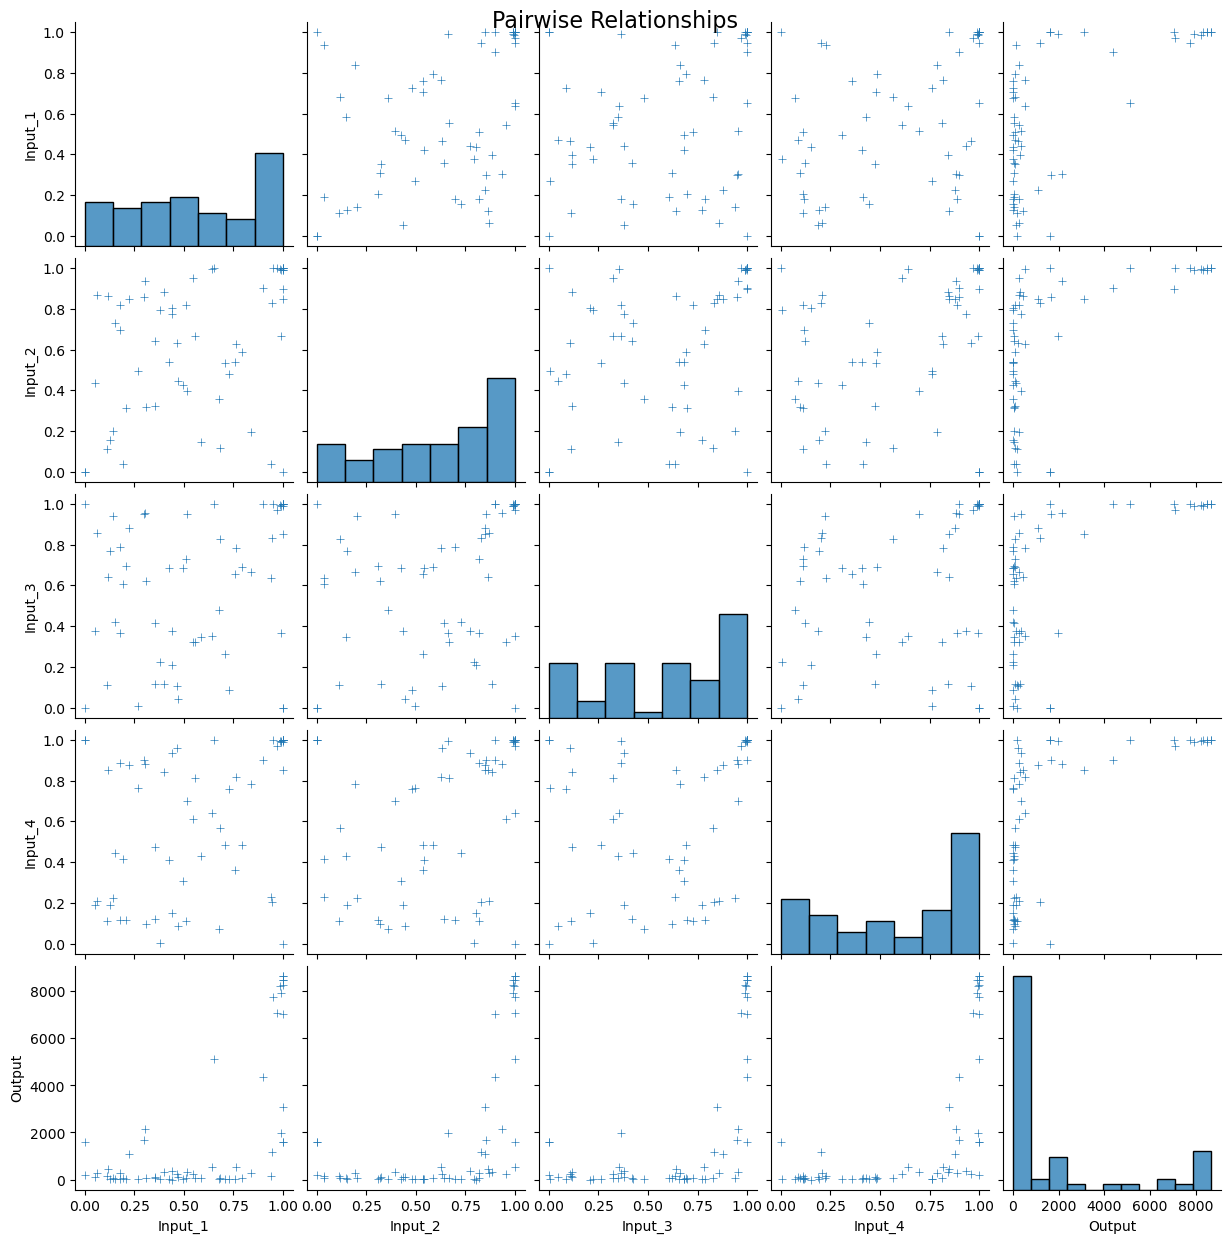

In [12]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## FOR THIS CASE ONLY


# 


### 28 Apr. Ask 1. [0.300000-0.855263-0.950000-0.900000]

- Mas exploratiroio con lengthscale mas grande

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.649999-0.999999-0.999999-0.999999]
- [0.300000-0.855263-0.950000-0.900000]

#### 10 may
Parece que encontramos un super maximo con valores pegados a 1 desde inputs 2 hasta 4. Podemos explorar un poco mas alredor de ese nivel y en otros lados.
CHECAR SI PUEDO METER 0 Y 1
- [0.999999-0.999999-0.999999-0.999999]
- [0.000001-0.000001-0.000001-0.999999]
- ONLY std [0.999999-0.850000-0.850000-0.850000]

#### 14 may
Ya encontramos un maximo en [0.999999-0.999999-0.999999-0.999999] . Se ve dificil encontrar algo mejor, pero vamos a ir explorando otras areas para ir confirmando
- [0.947368-0.999999-0.999999-0.999999]
Queda pendiente explorar otras zonas mas adelante. Ahorita vamos a machacar alrededor
***** Vamos por [0.947368-0.999999-0.999999-0.999999]

#### 17 may
Sigamos explorando en los alrededores:
- Beta 2.6 [0.986206-0.996551-0.996551-0.996551]
- ONLY std [0.900001-0.900001-0.999999-0.900001]

#### 1 jun
- VAMOS POR [0.970000-0.999999-0.970000-0.970000] (explorar mas)

#### 7 jun
- Beta 1.96 [0.999999-0.965516-0.999999-0.999999]
Beta casi CERO [0.999999-0.999999-0.999999-0.999999]
Beta 2.6 [0.999999-0.896551-0.999999-0.999999]+
query EI: [0.724137-0.000001-0.034484-0.000001]
query PI: [0.793103-0.586207-0.689655-0.482759]

- VAMOS POR [0.999999-0.896551-0.999999-0.999999] y [0.793103-0.586207-0.689655-0.482759]

#### 12 jun

- Normal likelihood
- Beta 1.96 [0.999999-0.999999-0.999999-0.999999]
- Beta casi CERO [0.999999-0.999999-0.999999-0.999999]
- Beta 2.6 [0.999999-0.999999-0.999999-0.999999]
- Beta 5 [0.000001-0.000001-0.999999-0.999999]

- Corriendo entre .98 y 1
- ONLY std [0.999999-0.999999-0.999999-0.980000]
- query EI: [0.980000-0.980000-0.980000-0.980000]
- query PI: [0.980000-0.980000-0.980000-0.980000]

- Corriendo entre .99 y 1
- ONLY std [0.999999-0.999999-0.999999-0.990000]
- query EI: [0.990000-0.990000-0.990000-0.990000]

- *** VAMOS POR [0.999999-0.999999-0.999999-0.990000] , [0.990000-0.990000-0.990000-0.990000]

#### 18 jun

Next query point UCB with Beta 1.96: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 0.01: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 1.0: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 2.6: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 4: [0.000001-0.000001-0.999999-0.999999]
Next query point EI: [0.692307-0.000001-0.102565-0.000001]
Next query point PI: [0.743589-0.564102-0.641025-0.384616]

- *** VAMOS POR [0.999999-0.990000-0.999999-0.999999]

#### 22 jun
Next query point UCB with Beta 1.96: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 0.01: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 1.0: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 2.6: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 4: [0.000001-0.000001-0.999999-0.999999] ++ Tengo que explorar en otros lados

- *** Vamos por [0.000001-0.000001-0.999999-0.999999]

#### 24 jun
Next query point UCB with Beta 1.96: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 0.01: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 1.0: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 2.6: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 4: [0.999999-0.999999-0.000001-0.000001]

- *** Vamos por [0.999999-0.999999-0.000001-0.000001] y [0.999999-0.990000-0.990000-0.999999]

#### 28 jun
Next query point UCB with Beta 1.96: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 0.01: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 4: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 8: [0.999999-0.000001-0.000001-0.999999]

- *** Vampos por el maximo para confirmar [0.999999-0.999999-0.999999-0.999999] y [0.999999-0.000001-0.000001-0.999999]

#### 1 jul
Next query point UCB with Beta 1.96: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 0.01: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 4: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 8: [0.999999-0.000001-0.000001-0.000001]
Next query point UCB with Beta 12: [0.999999-0.000001-0.000001-0.000001]

- Vampos por [0.999999-0.999999-0.999999-0.999999]

# New model

In [13]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-4, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999)   # Range for Input_4
    # Add more ranges for additional inputs if necessary
]

# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 40  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 4, 8,12], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



Best length scale: 0.42484712526982443
Best noise level: 1e-12
Next query point UCB with Beta 1.96: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 0.01: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 4: [0.999999-0.999999-0.999999-0.999999]
Next query point UCB with Beta 8: [0.999999-0.000001-0.000001-0.000001]
Next query point UCB with Beta 12: [0.999999-0.000001-0.000001-0.000001]


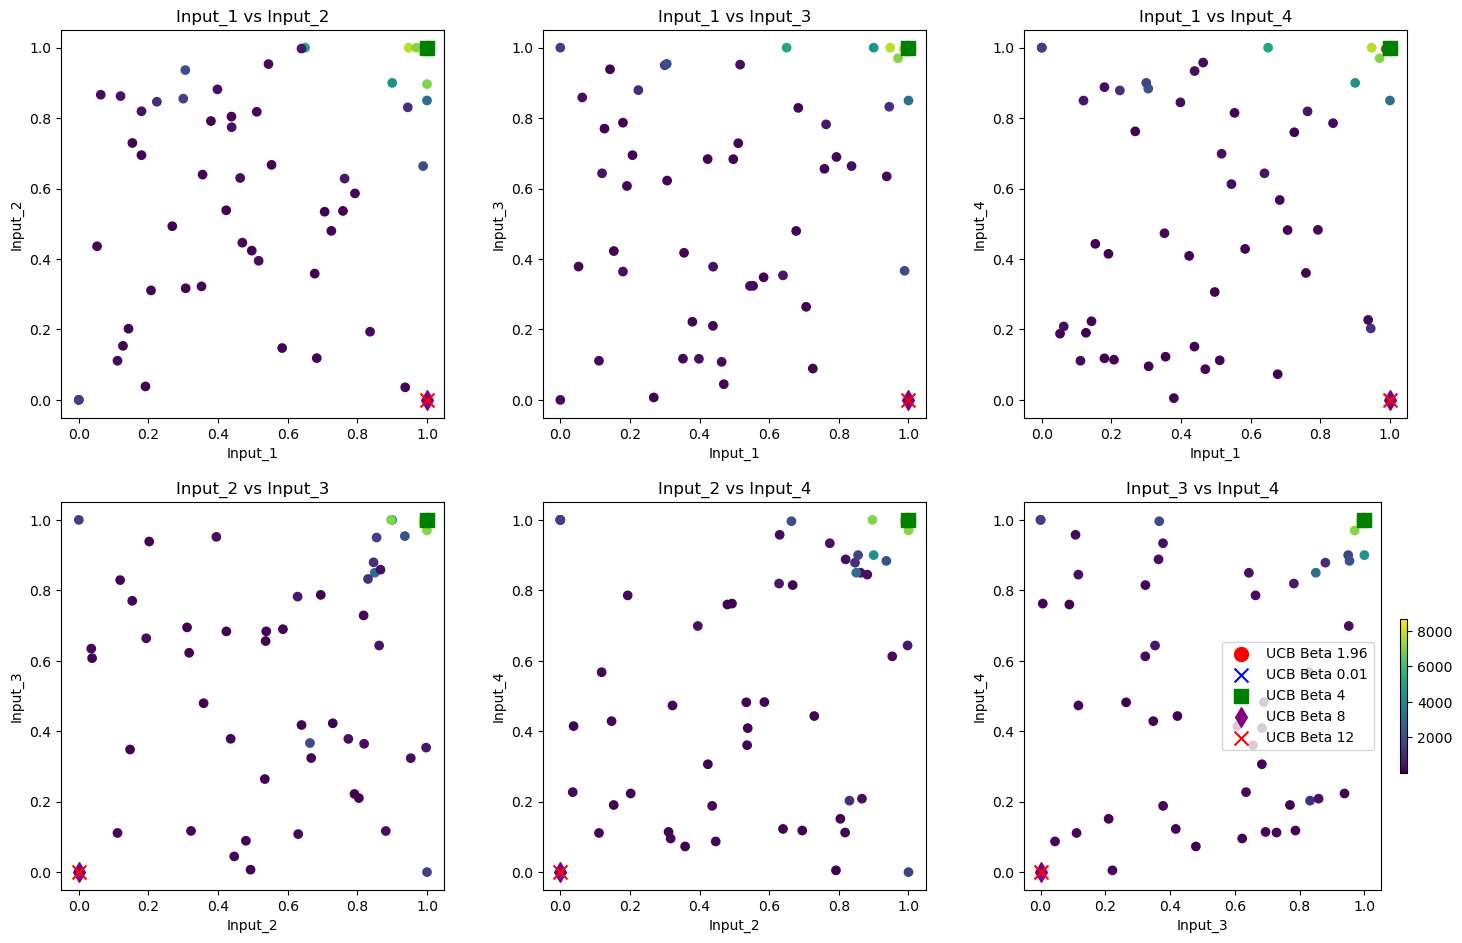

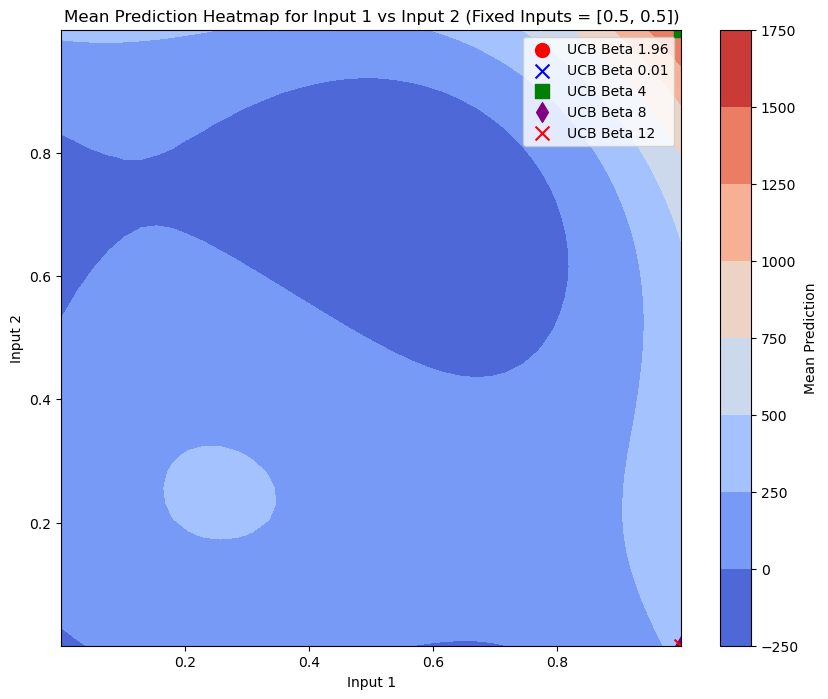

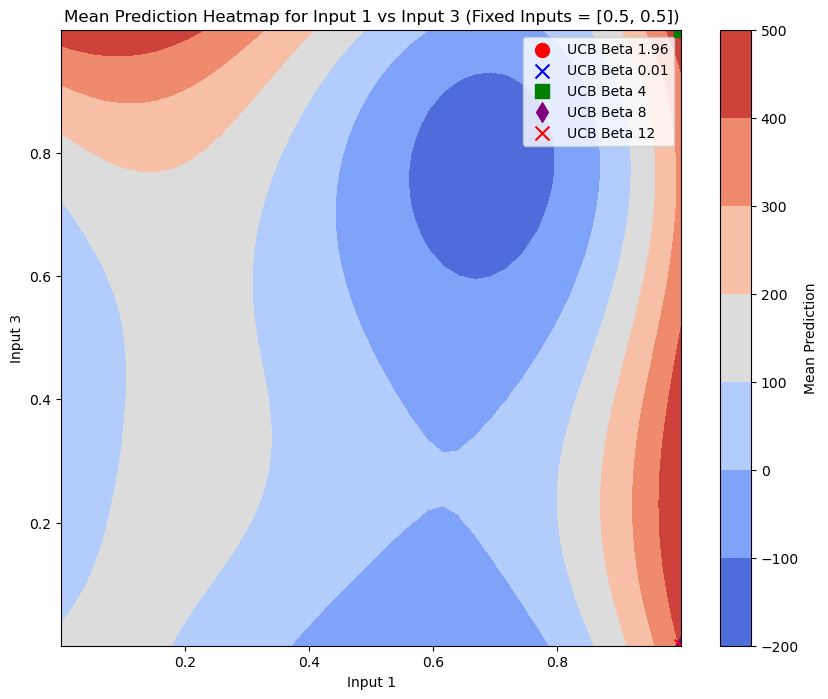

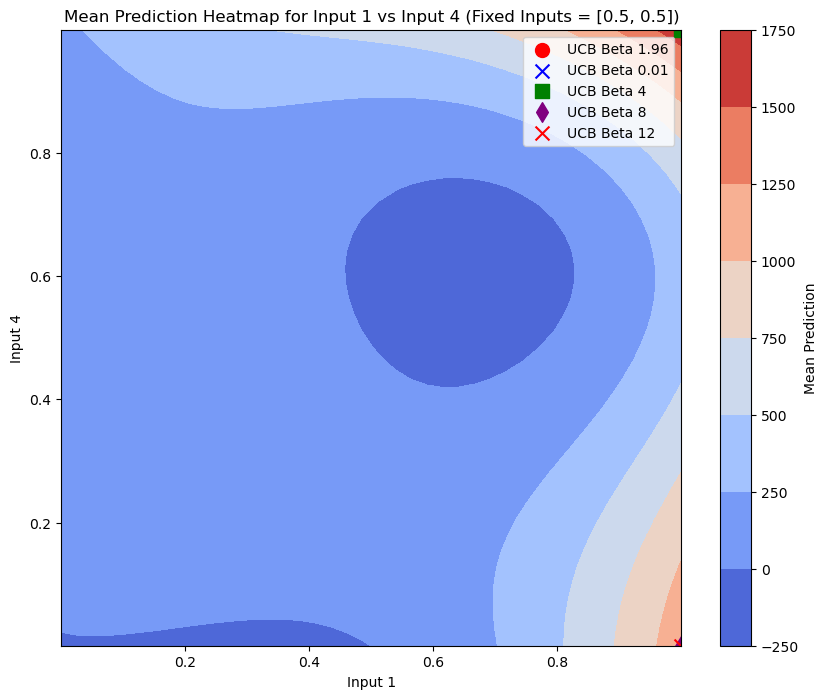

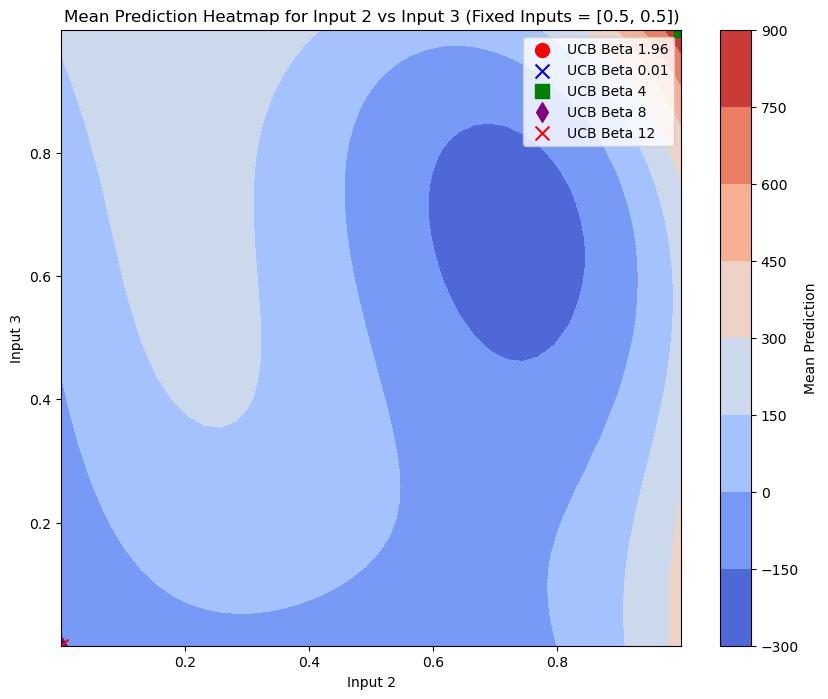

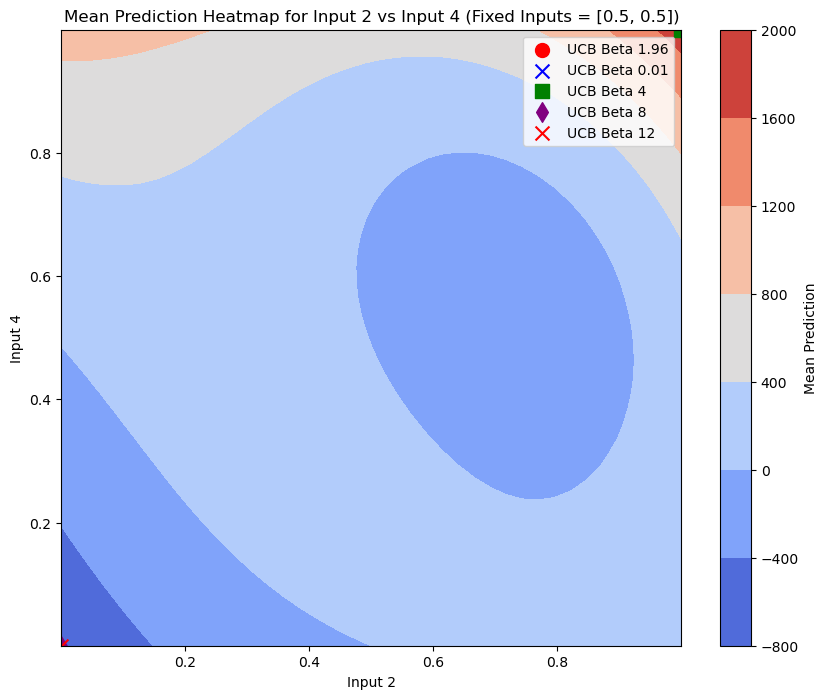

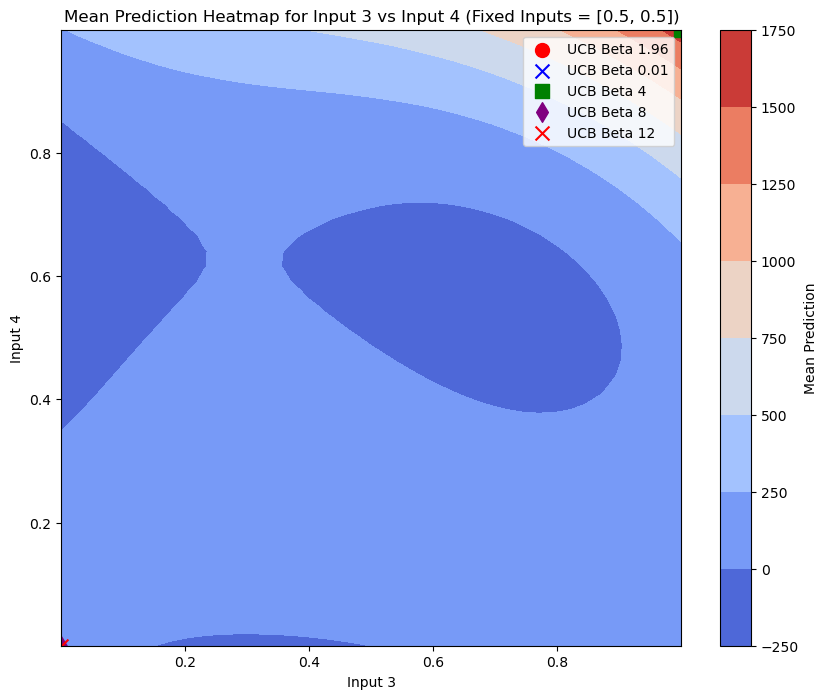

In [14]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)

In [15]:
# If there are multiple outputs for the same input, aggregate them
historical_feedback = df.groupby(['Input_1', 'Input_2','Input_3','Input_4']).agg(
    mean_output=('Output', 'mean'),
    var_output=('Output', 'var')
).reset_index()

# Fill NaN values in var_output with a small positive number
historical_feedback['var_output'].fillna(1e-10, inplace=True)

# Sort the DataFrame by Input_3, Input_2, and then Input_1
sorted_feedback = historical_feedback.sort_values(by=['Input_1', 'Input_2', 'Input_3','Input_4'])

# Print the sorted DataFrame
# Adjust the display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(sorted_feedback)

# Reset display settings to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

     Input_1   Input_2   Input_3   Input_4  mean_output    var_output
0   0.000001  0.000001  0.000001  0.999999   190.839622  1.000000e-10
1   0.000001  0.000001  0.999999  0.999999  1616.625747  1.000000e-10
2   0.052448  0.436149  0.378457  0.188026   121.188493  1.000000e-10
3   0.063048  0.866361  0.858649  0.208576   287.522281  1.000000e-10
4   0.111111  0.111111  0.111111  0.111111   161.986812  1.000000e-10
5   0.119879  0.862540  0.643331  0.849804   431.612757  1.000000e-10
6   0.126885  0.153430  0.770162  0.190518     9.972332  1.000000e-10
7   0.142756  0.202162  0.938644  0.223203    65.907033  1.000000e-10
8   0.153786  0.729382  0.422598  0.443074     8.847992  1.000000e-10
9   0.179955  0.694814  0.787057  0.118038    16.392394  1.000000e-10
10  0.179976  0.819484  0.364346  0.887966   273.993040  1.000000e-10
11  0.191447  0.038193  0.607418  0.414584    64.443440  1.000000e-10
12  0.207331  0.310918  0.694773  0.114115    35.926188  1.000000e-10
13  0.224189  0.8464